In [3]:
import tweepy
import pandas as pd
import numpy as np
import os
import tweepy as tw
from textblob import TextBlob

sleep_on_rate_limit=False

ModuleNotFoundError: No module named 'textblob'

In [71]:
consumer_key ="t37dWre7nh5Zl68H0Mhnd5Ptt"
consumer_key_secret="rBlGiKaN9RmsY7b2nq0c9wUUPfrSn4uKC8egA5DS0HKD3c6RiH"
access_token="1369718031769759746-a8vE51K7o8oLf6fD1XNKOnDwz4Gjaz"
access_token_secret= "FR2l4XIdk26k8DEaqqsBVkAXpD9RqAoehRtOvO6eJVRpG"
# Setup tweepy with Twitter credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

search_words = "Joe Biden"
date_since = "2020-10-27"
tweets = tw.Cursor(api.search, q=search_words, lang="en", since=date_since).items(500)
tweets
tweet_details = [[tweet.geo, tweet.text, tweet.user.screen_name, tweet.user.location] for tweet in tweets]
tweet_df_biden = pd.DataFrame(data=tweet_details, columns=["geo","text","user","location"])
tweet_df_biden.head()

,geo,text,user,location
0,None,RT @TeaPainUSA: The hit dogs are hollerin’. ht...,RealDonCheeto,Yes I Voted
1,None,"RT @WayneDupreeShow: ""At this point - Biden pr...",WhipperSnacker,South Carolina
2,None,"RT @JJDJ1187: Joe Biden gets into 'trouble,' s...",SAndricsak,
3,None,RT @ACTBrigitte: Is Joe Biden the worst presid...,McRN101,
4,None,RT @KimDotcom: “The future belongs to America....,CJDanielsFarms,NW Minnesota Farmer 🚜


TypeError: 'numpy.int64' object is not callable

In [72]:
import re
def clean_tweets(text):
  text = re.sub("RT @[\w]*:","",text)
  text = re.sub("@[\w]*","",text)
  text = re.sub("https?://[A-Za-z0-9./]*","",text)
  text = re.sub("\n","",text)
  return text
tweet_df_biden['text'] = tweet_df_biden['text'].apply(lambda x: clean_tweets(x))
tweet_df_biden['Subject'] = search_words
tweet_df_biden.head(20)

,geo,text,user,location,Subject
0,None,The hit dogs are hollerin’.,RealDonCheeto,Yes I Voted,Joe Biden
1,None,"""At this point - Biden probably got 8.2 milli...",WhipperSnacker,South Carolina,Joe Biden
2,None,"Joe Biden gets into 'trouble,' spends 30 seco...",SAndricsak,,Joe Biden
3,None,Is Joe Biden the worst president in US histor...,McRN101,,Joe Biden
4,None,“The future belongs to America.”— President J...,CJDanielsFarms,NW Minnesota Farmer 🚜,Joe Biden
5,None,Nicole Kidman portraying Lucille Ball...........,poppytim24,"Missouri, USA",Joe Biden
6,None,Keystone XL is nicknamed the ‘Zombie Pipeline...,ActivistHat_,,Joe Biden
7,None,"Joe Biden and Jimmy Carter, 1979: 📷: Biden's ...",wdrohrer,"Vancouver, British Columbia",Joe Biden
8,None,"Joe Biden said "" White Supremacy is Terrorism...",LandmarkCarol,,Joe Biden
9,None,Everything Joe Biden says about guns is idiotic.,kinseiji8,,Joe Biden


In [73]:
search_words = "Donald Trump"
date_since = "2020-10-27"
tweets = tw.Cursor(api.search, q=search_words, lang="en", since=date_since).items(500)
tweets
tweet_details = [[tweet.geo, tweet.text, tweet.user.screen_name, tweet.user.location] for tweet in tweets]
tweet_df_trump = pd.DataFrame(data=tweet_details, columns=["geo","text","user","location"])
tweet_df_trump.head()

Rate limit reached. Sleeping for: 35


,geo,text,user,location
0,None,Latest from Donald Trump: 2024 and Running Mat...,janel_savage,", USA"
1,None,RT @WIONews: Former US president and reality s...,munishkagg,
2,None,@travisakers @thedailybeast So Greenberg offer...,bchadhill,"New Orleans, LA"
3,None,RT @SpiroAgnewGhost: Watching the recent news ...,dhighl5184,Black Hawk
4,None,RT @ProjectLincoln: .@GOPLeader Kevin McCarthy...,mamahasaheadac1,


In [74]:
import re
def clean_tweets(text):
  text = re.sub("RT @[\w]*:","",text)
  text = re.sub("@[\w]*","",text)
  text = re.sub("https?://[A-Za-z0-9./]*","",text)
  text = re.sub("\n","",text)
  return text
tweet_df_trump['text'] = tweet_df_trump['text'].apply(lambda x: clean_tweets(x))
tweet_df_trump['Subject'] = search_words
tweet_df_trump.head(20)

,geo,text,user,location,Subject
0,None,Latest from Donald Trump: 2024 and Running Mat...,janel_savage,", USA",Donald Trump
1,None,"Former US president and reality show star, Do...",munishkagg,,Donald Trump
2,None,So Greenberg offered Stone $250k in essentia...,bchadhill,"New Orleans, LA",Donald Trump
3,None,Watching the recent news lately &amp; connect...,dhighl5184,Black Hawk,Donald Trump
4,None,. Kevin McCarthy wants us to forget what we a...,mamahasaheadac1,,Donald Trump
5,None,Kevin McCarthy wants us to forget what we all...,leelee24305982,,Donald Trump
6,None,Search Warrants Move Feds Closer to Charging ...,MadVet2000,"Melbourne, Victoria",Donald Trump
7,None,Search Warrants Move Feds Closer to Charging ...,Diana_Chumley,"Tennessee, USA",Donald Trump
8,None,It is not that Steve Bannon gleefully cherishe...,badpersonbot,,Donald Trump
9,None,Here's with former President Donald Trump said...,gromerjeffers,,Donald Trump


In [81]:
#tweet_df_biden.append(tweet_df_trump, ignore_index = True)
tweet_combined_df = pd.concat([tweet_df_trump, tweet_df_biden], ignore_index=True, sort=False)

In [82]:

    states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New York', 'New Mexico', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
    stateCodes = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
    stateMapping = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 
                      'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NY': 'New York', 'NM': 'New Mexico', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT':  'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV':  'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}
    tweet_copied_df = tweet_combined_df
    for index, row in tweet_combined_df.iterrows():
      flag = 0
      if row.location:
        locationSplit = row.location.split(',')
        for word in locationSplit:
          word_stripped = word.strip()
          if word_stripped in states:
            flag = 1
            row['state'] = word_stripped
          elif word_stripped in stateCodes:
            flag = 1
            row['state'] = stateMapping[word_stripped]
      if flag == 0:
        tweet_copied_df = tweet_copied_df.drop(index=index)
      else:
        tweet_copied_df.loc[index, 'state'] = row['state']
        

        

In [83]:
tweet_copied_df.to_csv('tweets_election.csv',mode='a')

In [5]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/likhithadivyani/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
tweets_election_df = pd.read_csv('tweets_election.csv')
tweets_trump = tweets_election_df[tweets_election_df.Subject == 'Donald Trump']
tweets_trump.drop(tweets_trump.columns[0], axis=1, inplace = True)
tweets_trump.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,geo,text,user,location,Subject,state
0,NaN,So Greenberg offered Stone $250k in essentia...,bchadhill,"New Orleans, LA",Donald Trump,Louisiana
1,NaN,Search Warrants Move Feds Closer to Charging ...,Diana_Chumley,"Tennessee, USA",Donald Trump,Tennessee
2,NaN,"Propaganda media behaved, relentlessly, as if...",Desertgramma1,"Arizona, USA",Donald Trump,Arizona
3,NaN,This could be the lead-in every day: Donald ...,martyq01,New Jersey,Donald Trump,New Jersey
4,NaN,"Donald Trump, twice impeached, criminal activ...",rradgoski,"Scranton, PA",Donald Trump,Pennsylvania


In [7]:
tweets_biden = tweets_election_df[tweets_election_df.Subject == 'Joe Biden']
tweets_biden.drop(tweets_biden.columns[0], axis=1, inplace = True)
tweets_biden.head()

,geo,text,user,location,Subject,state
143,NaN,"""At this point - Biden probably got 8.2 milli...",WhipperSnacker,South Carolina,Joe Biden,South Carolina
144,NaN,Nicole Kidman portraying Lucille Ball...........,poppytim24,"Missouri, USA",Joe Biden,Missouri
145,NaN,"In breaking NFL Draft News, Joe Biden has chos...",stranahan,"Sioux Falls, SD",Joe Biden,South Dakota
146,NaN,What makes Joe Biden such a good President is...,POTUS45stinks,"Oregon, USA",Joe Biden,Oregon
147,NaN,Everything Joe Biden says about guns is idiotic.,VACountryBoy94,"Virginia, USA",Joe Biden,Virginia


In [8]:
df = pd.merge(tweets_trump['state'].value_counts(), tweets_biden['state'].value_counts(), right_index = True, 
               left_index = True)
df = df.rename(columns = {"state_x": "Total Trump Mentions", "state_y": "Total Biden Mentions"})
ax = df.plot(kind='barh', figsize=(16, 25), zorder=2)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Replacing ticks with horizontal lines
#ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
vals = ax.get_xticks()
for tick in vals:
      ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set y-axis label
ax.set_ylabel("States", labelpad=20, weight='bold', size=12)
ax.set_title('Comparison of Twitter mentions of both candidates in all US states as per data collected',fontweight="bold", size=15)

Text(0.5, 1.0, 'Comparison of Twitter mentions of both candidates in all US states as per data collected')

In [9]:
tweets_trump['sentiment'] = tweets_trump['text'].apply(lambda x: sid.polarity_scores(x))
tweets_biden['sentiment'] = tweets_biden['text'].apply(lambda x: sid.polarity_scores(x))
def sentimentVerdict(sentiment):
  if sentiment['compound'] >= 0.05:
    return "Positive"
  elif sentiment['compound'] <= -0.05:
    return "Negative"
  else:
    return "Neutral"
tweets_trump['sentiment_overall'] = tweets_trump['sentiment'].apply(lambda x: sentimentVerdict(x))
tweets_biden['sentiment_overall'] = tweets_biden['sentiment'].apply(lambda x: sentimentVerdict(x))
tweets_trump.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,geo,text,user,location,Subject,state,sentiment,sentiment_overall
0,NaN,So Greenberg offered Stone $250k in essentia...,bchadhill,"New Orleans, LA",Donald Trump,Louisiana,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
1,NaN,Search Warrants Move Feds Closer to Charging ...,Diana_Chumley,"Tennessee, USA",Donald Trump,Tennessee,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
2,NaN,"Propaganda media behaved, relentlessly, as if...",Desertgramma1,"Arizona, USA",Donald Trump,Arizona,"{'neg': 0.202, 'neu': 0.688, 'pos': 0.109, 'co...",Negative
3,NaN,This could be the lead-in every day: Donald ...,martyq01,New Jersey,Donald Trump,New Jersey,"{'neg': 0.222, 'neu': 0.778, 'pos': 0.0, 'comp...",Negative
4,NaN,"Donald Trump, twice impeached, criminal activ...",rradgoski,"Scranton, PA",Donald Trump,Pennsylvania,"{'neg': 0.349, 'neu': 0.651, 'pos': 0.0, 'comp...",Negative


In [10]:
m=tweets_trump["text"]
tweets_trump["Subjectivity"] = m.apply(lambda word: TextBlob(word).sentiment.subjectivity)

NameError: name 'TextBlob' is not defined

In [89]:
print(tweets_trump["sentiment_overall"].value_counts())

Negative    110
Neutral      98
Positive     78
Name: sentiment_overall, dtype: int64


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


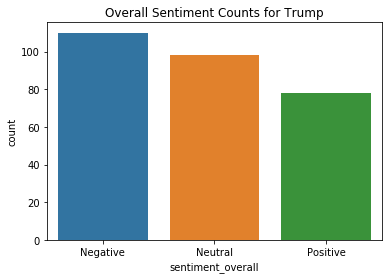

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

tweets_trump["sentiment_overall"] = tweets_trump["sentiment_overall"].astype("category")

# Visualize the Label counts
sns.countplot(tweets_trump["sentiment_overall"])
plt.title("Overall Sentiment Counts for Trump")
plt.show()



In [90]:
print(tweets_biden["sentiment_overall"].value_counts())

Negative    122
Positive    116
Neutral      72
Name: sentiment_overall, dtype: int64


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


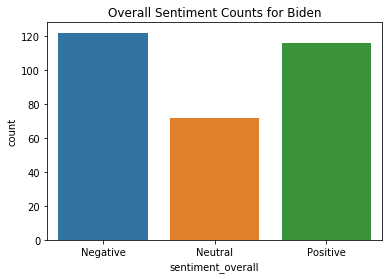

In [100]:
tweets_biden["sentiment_overall"] = tweets_biden["sentiment_overall"].astype("category")

# Visualize the Label counts
sns.countplot(tweets_biden["sentiment_overall"])
plt.title("Overall Sentiment Counts for Biden")
plt.show()

In [96]:
tweets_trump_location = tweets_trump.groupby(['state', 'sentiment_overall']).count()
tweets_trump_location = tweets_trump_location['user']
tweets_biden_location = tweets_biden.groupby(['state', 'sentiment_overall']).count()
tweets_biden_location = tweets_biden_location['user']
tweets_location_df = pd.DataFrame({'State': [state for state in states],
        'Trump Positive': [0 for state in states],
        'Trump Negative': [0 for state in states],
        'Trump Neutral': [0 for state in states],
        'Trump Total': [0 for state in states],
        'Biden Positive': [0 for state in states],
        'Biden Negative': [0 for state in states],
        'Biden Neutral': [0 for state in states],
        'Biden Total': [0 for state in states]})
tweets_location_df.set_index('State', inplace = True)
for state in states:
  positiveTrump, negativeTrump, neutralTrump, positiveBiden, negativeBiden, neutralBiden = 0, 0, 0, 0, 0, 0
  try:
    positiveTrump = tweets_trump_location[state]['Positive']
  except:
    positiveTrump = 0
  
  try:
    negativeTrump = tweets_trump_location[state]['Negative']
  except:
    negativeTrump = 0
  
  try:
    neutralTrump = tweets_trump_location[state]['Neutral']
  except:
    neutralTrump = 0
  
  try:
    positiveBiden = tweets_biden_location[state]['Positive']
  except:
    positiveBiden = 0
  
  try:
    negativeBiden = tweets_biden_location[state]['Negative']
  except:
    negativeBiden = 0
  
  try:
    neutralBiden = tweets_biden_location[state]['Neutral']
  except:
    neutralBiden = 0

  totalTrump = positiveTrump + negativeTrump + neutralTrump
  totalBiden = positiveBiden + negativeBiden + neutralBiden

  if totalTrump == 0:
    tweets_location_df.at[state, 'Trump Positive'], tweets_location_df.at[state, 'Trump Negative'], tweets_location_df.at[state, 'Trump Neutral'] = 0,0,0
  else:
    tweets_location_df.at[state, 'Trump Positive'] = round((positiveTrump/totalTrump)*100.0)
    tweets_location_df.at[state, 'Trump Negative'] = round((negativeTrump/totalTrump)*100.0)
    tweets_location_df.at[state, 'Trump Neutral'] = round((neutralTrump/totalTrump)*100.0)
  tweets_location_df.at[state, 'Trump Total'] = totalTrump
  
  if totalBiden == 0:
    tweets_location_df.at[state, 'Biden Positive'], tweets_location_df.at[state, 'Biden Negative'], tweets_location_df.at[state, 'Biden Neutral'] = 0,0,0
  else:
    tweets_location_df.at[state, 'Biden Positive'] = round((positiveBiden/totalBiden)*100.0)
    tweets_location_df.at[state, 'Biden Negative'] = round((negativeBiden/totalBiden)*100.0)
    tweets_location_df.at[state, 'Biden Neutral'] = round((neutralBiden/totalBiden)*100.0)
  tweets_location_df.at[state, 'Biden Total'] = totalBiden
tweets_location_df


,Trump Positive,Trump Negative,Trump Neutral,Trump Total,Biden Positive,Biden Negative,Biden Neutral,Biden Total
State,,,,,,,,
Alabama,0,100,0,4,100,0,0,2
Alaska,100,0,0,2,100,0,0,2
Arizona,20,60,20,20,43,43,14,14
Arkansas,0,0,0,0,0,0,0,0
California,39,22,39,36,62,31,6,32
Colorado,33,33,33,6,0,67,33,6
Connecticut,0,0,0,0,0,100,0,2
Delaware,0,0,0,0,0,0,0,0
Florida,25,33,42,24,50,25,25,32


In [ ]:
le = LabelEncoder()
tweets_trump["Label_enc"] = le.fit_transform(tweets_processed["Label"])

# Display the encoded labels
display(tweets_processed[["Label_enc"]].head())

# Select the features and the target
X = tweets_processed['Processed']
y = tweets_processed["Label_enc"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

